<a href="https://colab.research.google.com/github/themasudur/Pattern-Recognition/blob/main/HW1_C00553517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

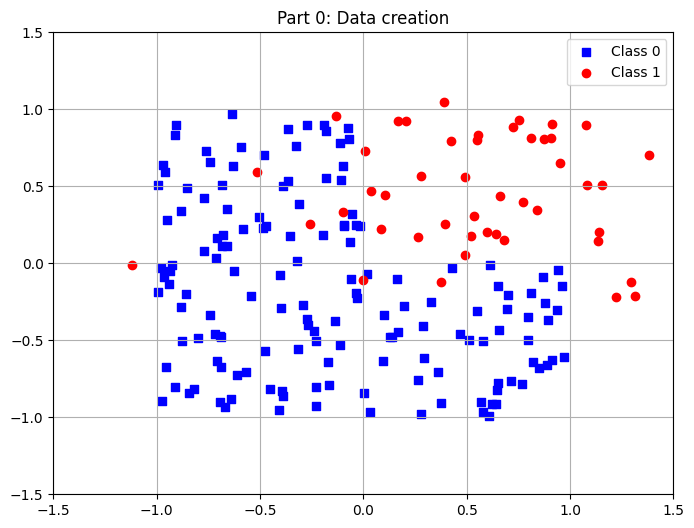

In [ ]:
# Part 0
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# For Class 0
square1 = np.random.uniform(low=[-1, -1], high=[0, 0], size=(50, 2))
square2 = np.random.uniform(low=[-1, 0], high=[0, 1], size=(50, 2))
square3 = np.random.uniform(low=[0, -1], high=[1, 0], size=(50, 2))
class_0 = np.vstack((square1, square2, square3))

# For Class 1
class_1 = np.random.normal(loc=[0.5, 0.5], scale=[0.5, 0.5], size=(50, 2))

# Class labels
class_labels_0 = np.zeros((150,))
class_labels_1 = np.ones((50,))

X = np.vstack((class_0, class_1))
y = np.hstack((class_labels_0, class_labels_1))

plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], label='Class 0', color='blue', marker='s')
plt.scatter(X[y==1][:,0], X[y==1][:,1], label='Class 1', color='red', marker='o')
plt.title("Part 0: Data creation")
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.show()

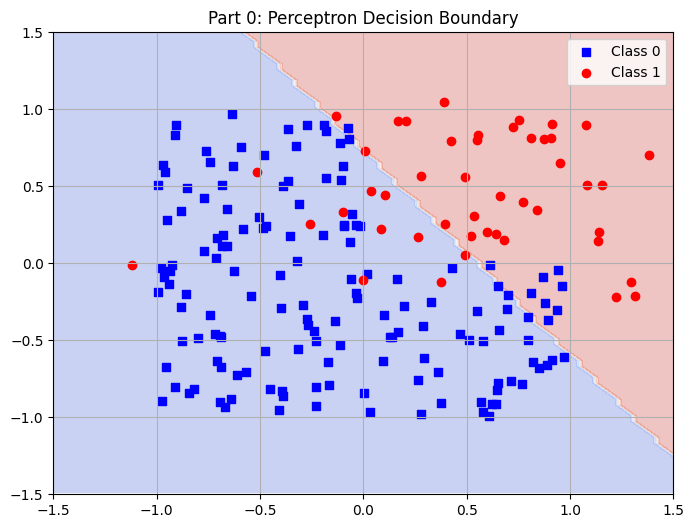

In [ ]:
# Part 1
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X, y)

# Plotting perceptron decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='s', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='o', label='Class 1')
plt.title("Part 0: Perceptron Decision Boundary")
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.show()

In [ ]:
cv = KFold(n_splits=4, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(perceptron, X, y, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(perceptron, X, y, cv=cv, scoring='precision')
recall_scores = cross_val_score(perceptron, X, y, cv=cv, scoring='recall')
auroc_scores = cross_val_score(perceptron, X, y, cv=cv, scoring='roc_auc')
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.9  0.88 0.9  0.76]
4-Fold CV precision scores:	[1.   0.67 0.89 1.  ]
4-Fold CV recall scores:	[0.58 0.91 0.67 0.2 ]
4-Fold CV AUROC scores:		[0.89 0.94 0.95 0.93]

Variance of accuracy:	0.0034


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# 17+16+17=50
square1 = np.random.uniform(low=[-1, -1], high=[0, 0], size=(17, 2))
square2 = np.random.uniform(low=[-1, 0], high=[0, 1], size=(16, 2))
square3 = np.random.uniform(low=[0, -1], high=[1, 0], size=(17, 2))
test_class_0 = np.vstack((square1, square2, square3))

test_class_1 = np.random.multivariate_normal([0.5, 0.5], [[0.5, 0], [0, 0.5]], 50)

X_test = np.vstack((test_class_0, test_class_1))
y_test = np.array([0] * 50 + [1] * 50)

y_pred = perceptron.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_auroc = roc_auc_score(y_test, perceptron.decision_function(X_test))

print(f"Test Accuracy:\t{test_accuracy:.4f}")
print(f"Test Precision:\t{test_precision:.4f}")
print(f"Test Recall:\t{test_recall:.4f}")
print(f"Test AUROC:\t{test_auroc:.4f}")

Test Accuracy:	0.7200
Test Precision:	0.8235
Test Recall:	0.5600
Test AUROC:	0.8164


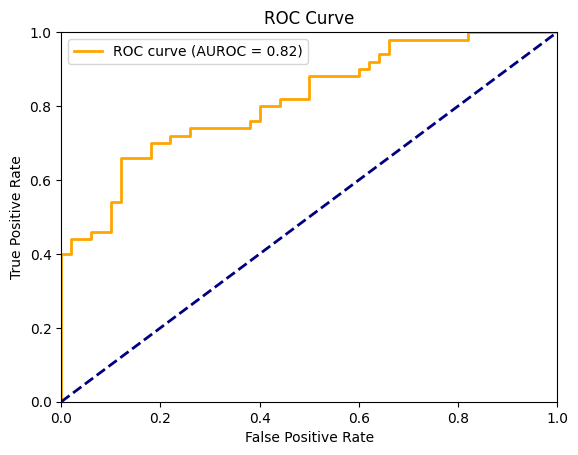

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = perceptron.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUROC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.legend()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.grid(True)
plt.show()

In [ ]:
# Part 2A
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

clf = LinearSVC(C=0.01, random_state=42)

cv_results = cross_validate(
    clf, X, y, cv=4,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc']
)
#print(cv_results)

accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
auroc_scores = cv_results['test_roc_auc']
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.84 0.82 0.88 0.8 ]
4-Fold CV precision scores:	[1.   1.   1.   0.58]
4-Fold CV recall scores:	[0.33 0.25 0.54 0.85]
4-Fold CV AUROC scores:		[1.   0.85 0.96 0.88]

Variance of accuracy:	0.0009


In [ ]:
# Part 2B
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate

clf = LinearSVC(C=20, random_state=42)

cv_results = cross_validate(
    clf, X, y, cv=4,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc']
)
#print(cv_results)

accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
auroc_scores = cv_results['test_roc_auc']
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.88 0.86 0.86 0.74]
4-Fold CV precision scores:	[1.   0.69 0.69 0.5 ]
4-Fold CV recall scores:	[0.5  0.75 0.85 0.92]
4-Fold CV AUROC scores:		[1.   0.86 0.95 0.92]

Variance of accuracy:	0.0031


In [ ]:
# Part 3A
from sklearn.svm import SVC

clf = SVC(C=0.06, kernel='rbf', random_state=42)

cv_results = cross_validate(
    clf, X, y, cv=4,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc']
)
#print(cv_results)

accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
auroc_scores = cv_results['test_roc_auc']
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.78 0.8  0.8  0.9 ]
4-Fold CV precision scores:	[1. 1. 1. 1.]
4-Fold CV recall scores:	[0.08 0.17 0.23 0.62]
4-Fold CV AUROC scores:		[0.84 0.93 0.99 0.91]

Variance of accuracy:	0.0022


In [ ]:
# Part 3B
from sklearn.svm import SVC

clf = SVC(C=20, kernel='rbf', random_state=42)

cv_results = cross_validate(
    clf, X, y, cv=4,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc']
)
#print(cv_results)

accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
auroc_scores = cv_results['test_roc_auc']
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.92 0.9  1.   0.88]
4-Fold CV precision scores:	[1.   0.89 1.   0.71]
4-Fold CV recall scores:	[0.67 0.67 1.   0.92]
4-Fold CV AUROC scores:		[0.75 0.9  1.   0.94]

Variance of accuracy:	0.0021


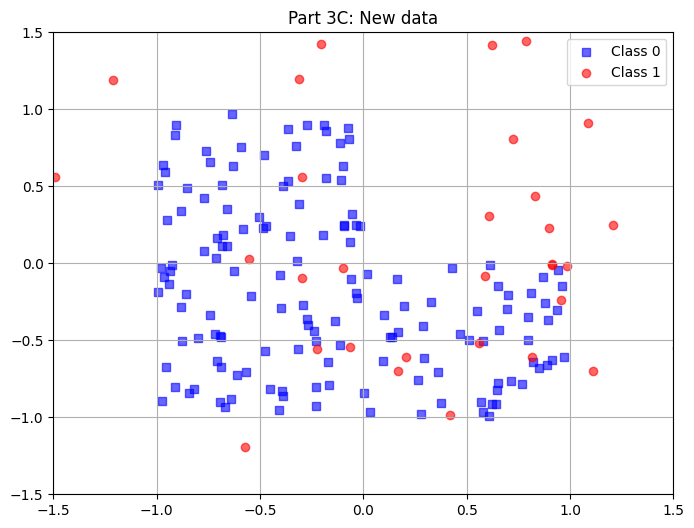

In [ ]:
# Part 3C
class1_hv = np.random.multivariate_normal([0.5, 0.5], [[1.5, 0], [0, 1.5]], 50)

new_X = np.vstack((class_0, class1_hv))
new_y = np.hstack((np.zeros(150), np.ones(50)))

plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0', color='blue', marker='s', alpha=0.6)
plt.scatter(class1_hv[:, 0], class1_hv[:, 1], label='Class 1', color='red', marker='o', alpha=0.6)
plt.title('Part 3C: New data')
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC(C=1, kernel='rbf', random_state=42)

cv_results = cross_validate(
    clf, new_X, new_y, cv=4,
    scoring=['accuracy', 'precision', 'recall', 'roc_auc']
)
#print(cv_results)

accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
auroc_scores = cv_results['test_roc_auc']
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.84 0.88 0.9  0.68]
4-Fold CV precision scores:	[1.   1.   1.   0.43]
4-Fold CV recall scores:	[0.33 0.5  0.62 0.77]
4-Fold CV AUROC scores:		[0.68 0.79 0.97 0.81]

Variance of accuracy:	0.0075


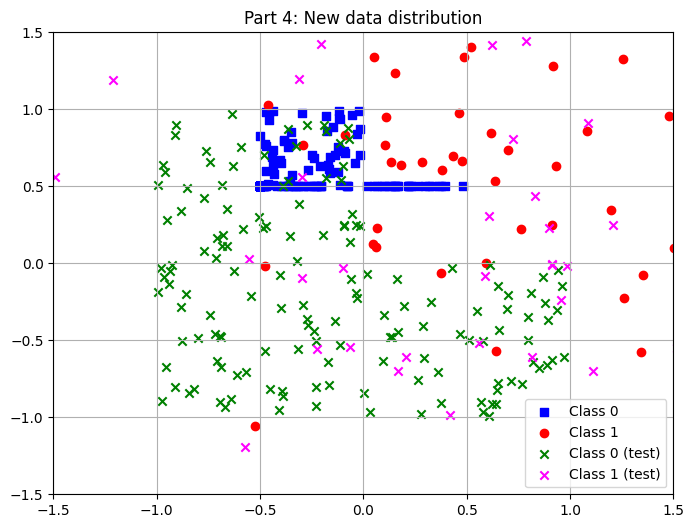

In [ ]:
# Part 4
# For training set of Class 0
square1 = np.random.uniform(low=[-0.5, 0.5], high=[-0.5, 0.5], size=(50, 2))
square2 = np.random.uniform(low=[-0.5, 0.5], high=[0.5, 0.5], size=(50, 2))
square3 = np.random.uniform(low=[0, 1], high=[-0.5, 0.5], size=(50, 2))
new_class_0 = np.vstack((square1, square2, square3))

# For training set of Class 1
new_class_1 = np.random.multivariate_normal([0.5, 0.5], [[0.5, 0], [0, 0.5]], 50)

# Class labels
class_labels_0 = np.zeros((150,))
class_labels_1 = np.ones((50,))

X_train = np.vstack((new_class_0, new_class_1))
y_train = np.hstack((class_labels_0, class_labels_1))

# For test set of Class 0 and 1: We are using the same distribution of Class 0 and 1
# as before in Part 3C, so no need to recreate, just reassigned

X_test = new_X
y_test = new_y

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], label='Class 0', color='blue', marker='s')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], label='Class 1', color='red', marker='o')
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], label='Class 0 (test)', color='green', marker='x')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label='Class 1 (test)', color='magenta', marker='x')
plt.title("Part 4: New data distribution")
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.show()

In [ ]:
clf = SVC(C=1, kernel='rbf', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cv = KFold(n_splits=4, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall')
auroc_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.92 0.96 0.98 0.9 ]
4-Fold CV precision scores:	[0.9 1.  1.  1. ]
4-Fold CV recall scores:	[0.75 0.82 0.92 0.67]
4-Fold CV AUROC scores:		[0.98 0.93 0.92 0.92]

Variance of accuracy:	0.0010


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_auroc = roc_auc_score(y_test, perceptron.decision_function(X_test))

print(f"Test Accuracy:\t{test_accuracy:.4f}")
print(f"Test Precision:\t{test_precision:.4f}")
print(f"Test Recall:\t{test_recall:.4f}")
print(f"Test AUROC:\t{test_auroc:.4f}")

Test Accuracy:	0.4300
Test Precision:	0.3000
Test Recall:	0.9600
Test AUROC:	0.7289


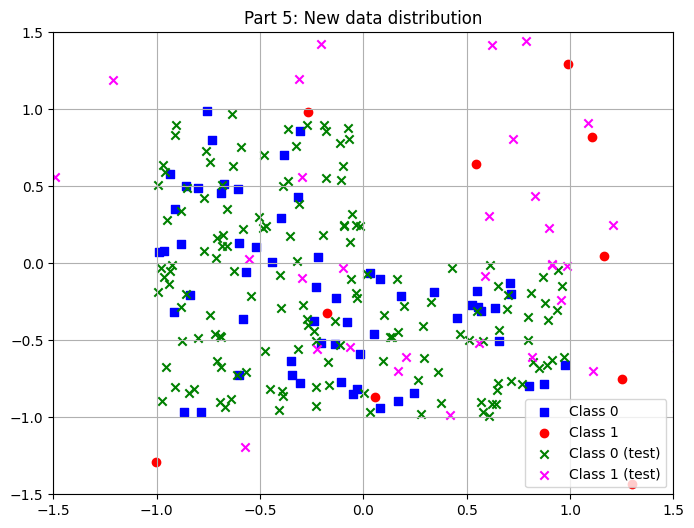

In [ ]:
# Part 5
# For training set of Class 0
square1 = np.random.uniform(low=[-1, -1], high=[0, 0], size=(20, 2))
square2 = np.random.uniform(low=[-1, 0], high=[0, 1], size=(20, 2))
square3 = np.random.uniform(low=[0, -1], high=[1, 0], size=(20, 2))
new_class_0 = np.vstack((square1, square2, square3))

# For training set of Class 1
new_class_1 = np.random.multivariate_normal([0.5, 0.5], [[1.5, 0], [0, 1.5]], 20)

# Class labels
class_labels_0 = np.zeros((60,))
class_labels_1 = np.ones((20,))

X_train = np.vstack((new_class_0, new_class_1))
y_train = np.hstack((class_labels_0, class_labels_1))

# For test set of Class 0 and 1: We are using the same distribution of Class 0 and 1
# as before in Part 3C, so no need to recreate, just reassigned

X_test = new_X
y_test = new_y

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], label='Class 0', color='blue', marker='s')
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], label='Class 1', color='red', marker='o')
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], label='Class 0 (test)', color='green', marker='x')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label='Class 1 (test)', color='magenta', marker='x')
plt.title("Part 5: New data distribution")
plt.legend()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.grid(True)
plt.show()

In [ ]:
clf = SVC(C=1, kernel='rbf', random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cv = KFold(n_splits=4, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall')
auroc_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')
accuracy_variance = np.var(accuracy_scores)

print(f"4-Fold CV accuracy scores:\t{np.round(accuracy_scores, 2)}")
print(f"4-Fold CV precision scores:\t{np.round(precision_scores, 2)}")
print(f"4-Fold CV recall scores:\t{np.round(recall_scores, 2)}")
print(f"4-Fold CV AUROC scores:\t\t{np.round(auroc_scores, 2)}")
print(f"\nVariance of accuracy:\t{accuracy_variance:.4f}")

4-Fold CV accuracy scores:	[0.95 0.9  0.85 0.95]
4-Fold CV precision scores:	[1. 1. 1. 1.]
4-Fold CV recall scores:	[0.8  0.5  0.4  0.83]
4-Fold CV AUROC scores:		[0.99 0.83 1.   0.83]

Variance of accuracy:	0.0017


In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_auroc = roc_auc_score(y_test, perceptron.decision_function(X_test))

print(f"Test Accuracy:\t{test_accuracy:.4f}")
print(f"Test Precision:\t{test_precision:.4f}")
print(f"Test Recall:\t{test_recall:.4f}")
print(f"Test AUROC:\t{test_auroc:.4f}")

Test Accuracy:	0.8750
Test Precision:	1.0000
Test Recall:	0.5000
Test AUROC:	0.7289
